In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)

In [43]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv')

In [44]:
X = df.select_dtypes(include = ['int', 'float']).drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

In [45]:
model = LinearRegression().fit(X, y)

In [46]:
y_pred = model.predict(X)

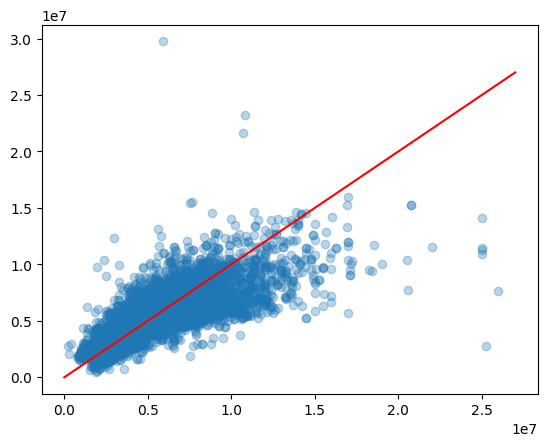

R2: 0.682


In [47]:
fig, ax = plt.subplots()

line = np.linspace(0, 27000000, 2)
plt.plot(line, line, color = 'red')

plt.scatter(y, y_pred, alpha = .3)

plt.show()

print(f'R2: {model.score(X, y):.3f}')

In [48]:
dict(zip(X.columns, model.coef_))

{'Primary room': -2207.6892587909624,
 'Usable area': 23989.43116057563,
 'Gross area': -470.22858274220977,
 'Year of construction': -1090.3919564149908,
 'Floor': 128259.63966805139,
 'Plot size': -5.142807831073287,
 'Joint debt at last sale': -0.22182484694962487,
 'Number of rooms': 170375.1178573405,
 'Number of bedrooms': 222569.55288212642,
 'Turnover rate': 95.20555336914133,
 'Postal code': -1362.149991098166,
 'Broker encoded': 31301.4743727554,
 'Housing type encoded': 98821.63526495396,
 'Balcony_Yes': 85384.97013576198,
 'Parking_Yes': -94416.49235165541,
 'Lat': 11007992.983969985,
 'Lon': 1173417.974533664,
 'Year': 3502.1829166911807,
 'Month': 2368.4238935614912,
 'Day': -1511.0022006334204,
 'Policy rate': 3245.8573792565708,
 'CPI': 14231.58836546354,
 'Change CPI': -9012.232124665967,
 'HPI Norway': -14560.673429269083,
 'HPI Trondheim': 29243.06100908136,
 'Borrowing rate%': -36609.03831190249}